Importar Librerías

In [2]:
import warnings
warnings.filterwarnings("ignore")

#Operaciones Básicas para manipulación de datos
import numpy as np
import pandas as pd
#Para la Correcta Visualización de los Datos
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import plotting
from pandas.plotting import parallel_coordinates

Leemos Nuestro Conjunto de Datos

In [3]:
#Importando los Datos
data = pd.read_csv("reclamos.csv")
#No limitar cuantas columnas se muestran
pd.set_option("display.max_columns",None)
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


Dimensionalidad de Nuestros Datos

In [5]:
#1000 registros y 39 variables.
data.shape

(1000, 39)

Obtenemos Información del Conjunto de Datos

In [11]:
#No existen datos faltantes
data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

Estadística Descriptiva

In [14]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


Matriz de Correlación

* En cuanto al Gráfico y sus parámetros en Seaborn:
    * data.corr → Muestra la matriz de correlación de los datos
    * cmap → Otorga un estilo a la gráfica (matriz)
    * linewidhts → Son el ancho de la línea, se recomienda .5
    * fmt → Designa cuantos decimales veremos
    * annot → Puede ser True o False, decide si las anotaciones de número estarán

Matriz de Correlación


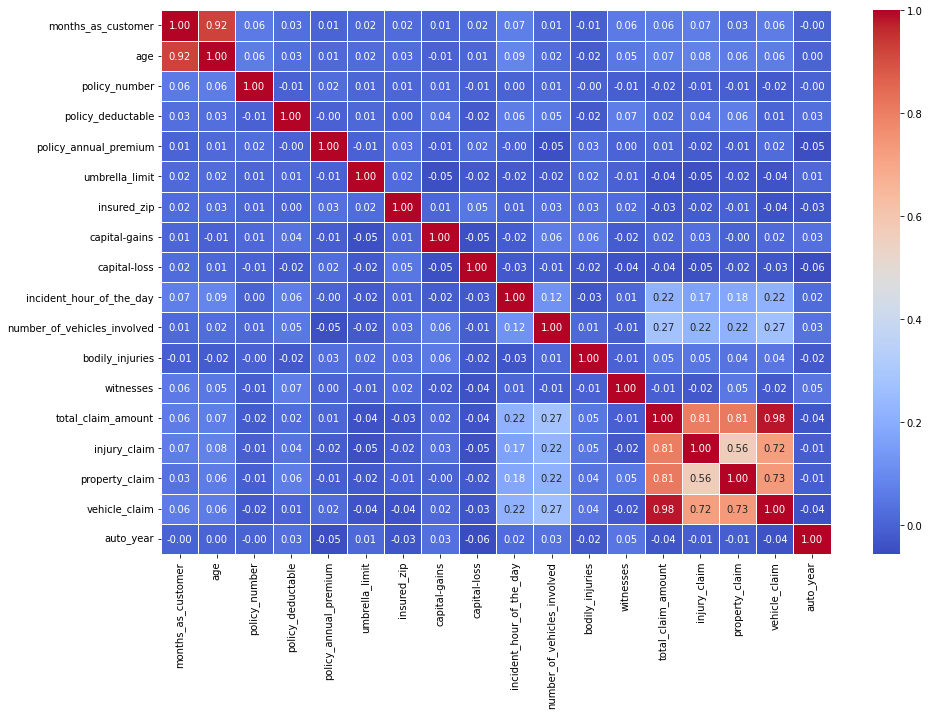

In [30]:
print("Matriz de Correlación")
#Controla el tamaño del Gráfico y Su relación Ancho & Largo
plt.rcParams["figure.figsize"] = (15,10)
#Graficamos una Matriz de correlación. 
sns.heatmap(data.corr(),cmap="coolwarm",linewidths=.5,fmt=".2f",annot=True);

Covarianza de los datos

In [31]:
data.cov()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.325104e+04,970.201810,1.703130e+06,1.888144e+03,1.410315e+02,4.098745e+06,1.476998e+05,2.053193e+04,6.537987e+04,56.525149,1.728322,-0.959327,7.468871,1.887564e+05,3.670575e+04,1.940521e+04,1.326454e+05,-0.202464
age,9.702018e+02,83.544841,1.395997e+05,1.632352e+02,3.214568e+01,3.806326e+05,1.678029e+04,-1.802445e+03,1.892620e+03,5.538026,0.205834,-0.117534,0.531856,1.685908e+04,3.369297e+03,2.685543e+03,1.080424e+04,0.074430
policy_number,1.703130e+06,139599.665361,6.608139e+10,-1.059731e+06,1.416366e+06,5.296036e+09,1.305565e+08,7.023384e+07,-4.095652e+07,201.322010,3518.009337,-961.035852,-3617.161738,-1.222275e+08,-1.099333e+07,-1.324355e+07,-9.799063e+07,-282.988733
policy_deductable,1.888144e+03,163.235235,-1.059731e+06,3.743784e+05,-4.848613e+02,1.527928e+07,1.993895e+05,6.005009e+05,-4.048617e+05,259.175175,31.927928,-11.423423,45.313313,3.689501e+05,1.167917e+05,1.912697e+05,6.088869e+04,96.088088
policy_annual_premium,1.410315e+02,32.145675,1.416366e+06,-4.848613e+02,5.961772e+04,-3.504155e+06,5.664307e+05,-9.349637e+04,1.615803e+05,-2.678940,-11.441581,5.362622,0.632688,5.862176e+04,-2.101409e+04,-1.372875e+04,9.336460e+04,-72.306760
umbrella_limit,4.098745e+06,380632.632633,5.296036e+09,1.527928e+07,-3.504155e+06,5.278077e+12,3.240420e+09,-3.026763e+09,-1.553189e+09,-371415.415415,-49788.788789,42850.850851,-17204.204204,-2.447073e+09,-5.092246e+08,-2.637003e+08,-1.674148e+09,136733.733734
insured_zip,1.476998e+05,16780.292669,1.305565e+08,1.993895e+05,5.664307e+05,3.240420e+09,5.141121e+09,1.259612e+07,9.948976e+07,4124.025754,2005.227796,1687.420324,1578.175520,-6.412337e+07,-6.122698e+06,-2.366451e+06,-5.563422e+07,-14120.443708
capital-gains,2.053193e+04,-1802.445245,7.023384e+07,6.005009e+05,-9.349637e+04,-3.026763e+09,1.259612e+07,7.768588e+08,-3.674132e+07,-3178.586987,1750.552653,1276.184985,-546.757457,1.175952e+07,3.528093e+06,-1.047625e+05,8.336193e+06,5264.676376
capital-loss,6.537987e+04,1892.620220,-4.095652e+07,-4.048617e+05,1.615803e+05,-1.553189e+09,9.948976e+07,-3.674132e+07,7.898403e+08,-4894.551752,-426.512212,-562.812412,-1290.858959,-2.675643e+07,-6.318256e+06,-3.100158e+06,-1.733802e+07,-9571.920821
incident_hour_of_the_day,5.652515e+01,5.538026,2.013220e+02,2.591752e+02,-2.678940e+00,-3.714154e+05,4.124026e+03,-3.178587e+03,-4.894552e+03,48.321586,0.855540,-0.197045,0.050422,3.995424e+04,5.624392e+03,6.021358e+03,2.830849e+04,0.893562


Limpiando Datos


In [34]:
#Los datos desconocidos están colocados como "?" se debe cambiar a NAN
data = data.replace("?",np.nan)

* Datos Faltantes en;
    * collision_type                 178
    * property_damage                360
    * police_report_available        343

Tratamiento de Datos Perdidos

In [41]:
# En cuanto a "collision_type" inputamos por la moda. 
data["collision_type"].fillna(data["collision_type"].mode()[0],inplace=True)
#En los casos posteriores simplemente los rellenaremos con NO
data["property_damage"].fillna("NO",inplace=True)
#Nuevamente si no hay response para police, será NO
data["police_report_available"].fillna("NO",inplace=True)

In [42]:
#Nos deshicimos de los valores nulos
data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

Vizualizamos los datos

* Lo empleado para realizar el gráfico.

* La Primera Línea es vital para creare el entorno gráfico. Y el grafo vacío. 
* La segunda, asignfamos el gráfico a un seaborn de tipo scatterplot
* Llamamos quien sera el eje x, llamamos quien sera el eje Y y podemos clasificar faculmente los puntos con "hue" eligiendo la categoría
* Los datos deben ser llamados y por lo mismo se puede elegir una "palette" osea una paleta de colores

Text(0.5, 1.0, 'Dispersión entre TotalClaimAmount & PolicyAnualPremium')

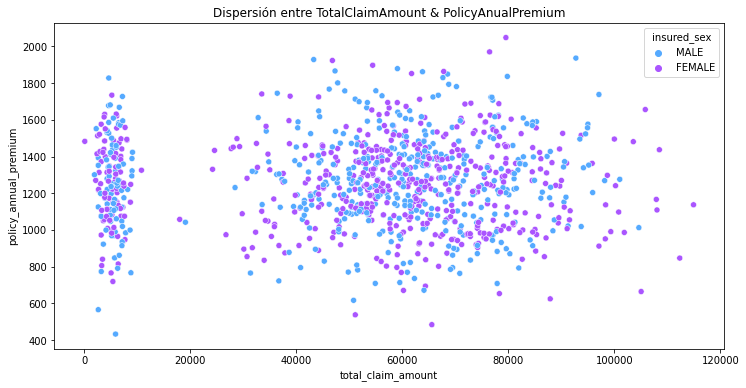

In [48]:
#Creamos el entorno del gráfico.
f,ax = plt.subplots(1,1,figsize=(12,6))
ax = sns.scatterplot(x="total_claim_amount",y="policy_annual_premium",hue="insured_sex",data=data,palette="cool")
plt.title("Dispersión entre TotalClaimAmount & PolicyAnualPremium")

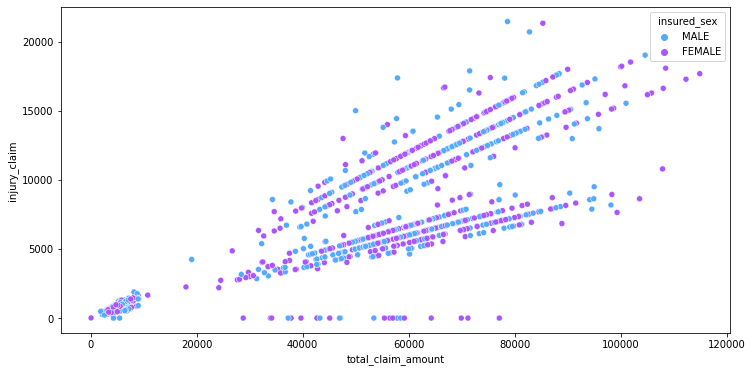

In [50]:
#Creamos Otro gráfico de dispersion
f,ax = plt.subplots(1,1,figsize=(12,6))
ax = sns.scatterplot(x="total_claim_amount",y= "injury_claim",hue="insured_sex",data=data,palette="cool")

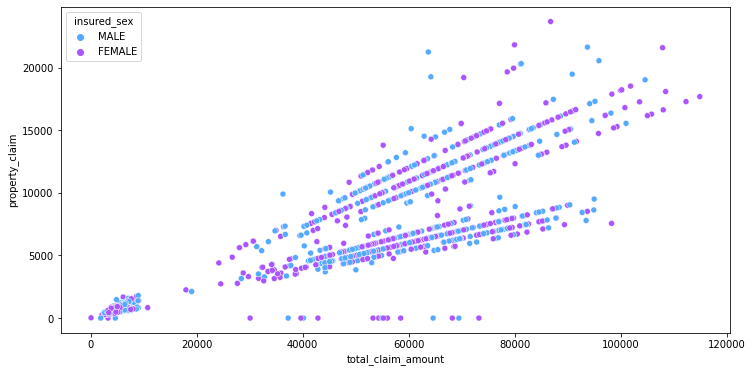

In [52]:
#Creamos Otro gráfico de dispersion
f,ax = plt.subplots(1,1,figsize=(12,6))
ax = sns.scatterplot(x="total_claim_amount",y= "property_claim",hue="insured_sex",data=data,palette="cool")

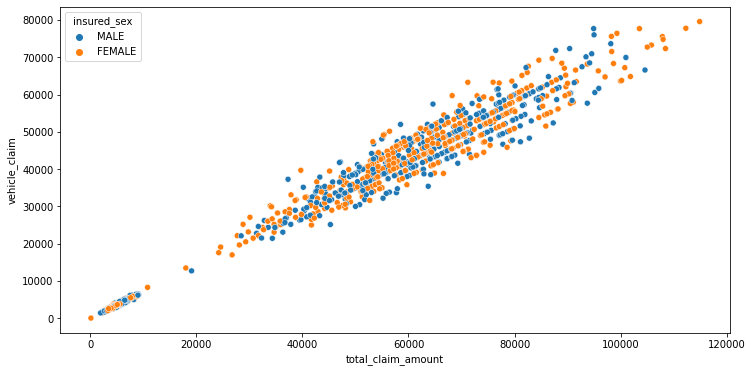

In [53]:
#Creamos Otro gráfico de dispersion
f,ax = plt.subplots(1,1,figsize=(12,6))
ax = sns.scatterplot(x="total_claim_amount",y= "vehicle_claim",hue="insured_sex",data=data)

Text(0, 0.5, 'Frecuencia')

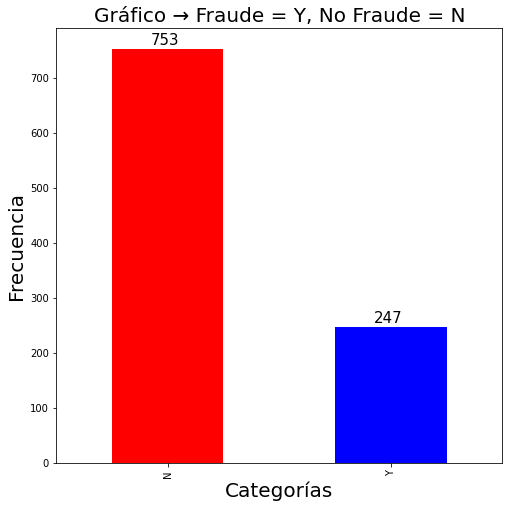

In [108]:
#Construcción de un Gráfico de Barras
ax = data["fraud_reported"].value_counts().plot.bar(color=["red","blue"],figsize=(8,8))
#Sirve para encontrar la cantidad exacta que representa cada barra.
for i in ax.patches:
    ax.text(i.get_x()+0.175, i.get_height()+8,str(round(i.get_height(),2)),fontsize=15)
#Titulo
plt.title("Gráfico → Fraude = Y, No Fraude = N",fontsize = 20)
#Categorías eje X
plt.xlabel("Categorías",fontsize=20)
#Frecuencia eje Y
plt.ylabel("Frecuencia",fontsize = 20)


* 247 personas de nuestro conjunto de datos registraron una situación de fraude.

Incident Type vs Vehicle Claim

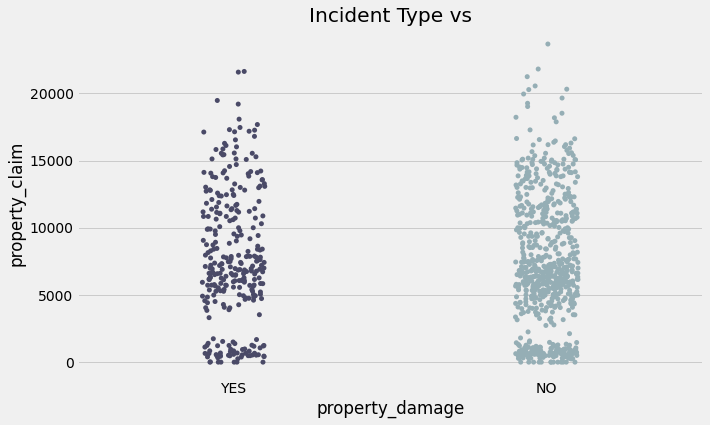

In [110]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (10,6)

sns.stripplot(data["property_damage"], data["property_claim"],palette="bone")
plt.title("Incident Type vs")
plt.show()